# Giriş
- Titanik, Güney Atlantik Okyanusunda 15 Nisan 1912 sabahın erken saatlerinde, Southampton'dan New York'a yaptığı yolculuk sırasında bir buzdağıyla çarpışarak battı. Tahmini 2.224 yolcu ve mürettebattan 1.500'ü aşkın insan öldü. Bu kaza modern tarihin en ölümcül deniz felaketlerinden biri olarak anılmasına sebep oldu.


<font color = 'red'>
İçerik : 
    
1. [Verinin Yüklenmesi ve İncelenmesi](#1)

2. [Verilerin açıklanması](#2)
    * [Tek Değişken Analizi](#3)
        * [Kategorik Değişken](#4)
        * [Sayısal Değişken](#5)
3. [Basit Veri Analizi](#6)
4. [Aykırı Gözlem Silme](#7)
5. [Boş gözlemler](#8)
    * [Boş gözlemleri Bulma](#9)
    * [Boş gözlemleri Doldurma](#10)
    
6. [Veri Görselleştirme](#11)
    * [(Survived ,Age , Parch , Sibsp , Pclass)  arasındaki ilişki ](#12) 
    * [(SibSp -- Survived ) arasındaki ilişki ](#13)
    * [(Parch -- Survived ) arasındaki ilişki ](#14)
    * [(Pclass -- Survived) arasındaki ilişki ](#15)
    * [(Age -- Survived ) arasındaki ilişki ](#16)
    * [(SibSp -- Age -- Survived) arasındaki ilişki](#17)
    * [(Embarked -- Pclass -- Sex -- Survived) arasındaki ilişki](#18)
    * [(Embarked -- Pclass -- Sex -- Survived) arasındaki ilişki](#19)
    * [(Embarked -- Fare -- Sex -- Survived) arasındaki ilişki](#20)
    * [(Age) değişkenindeki boşlukları doldurma](#21)
    
    

7. [Değişken analizi ,Değişken Birleşimleri ve Makina Öğrenmesine Uyarlanması](#22)
    * [Name-Title(İsim-Ünvan)](#23)
    * [Family size(Aile Boyutu)](#24)
    * [Embarket(Binilen liman)](#25)
    * [Pclasss(Yolcu sınıfı)](#26)
    * [Ticket(Bilet)](#27)
    * [Sex(Cinsiyet)](#28)

In [902]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid') # plt styleni belirtelim 


import warnings
warnings.filterwarnings("ignore")


from collections import Counter


<a id = 1 ></a>
# Verinin Yüklenmesi ve İncelenmesi

In [903]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [904]:
test_df.tail(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [905]:
sex_bacup = df["Sex"]

In [906]:
train_df.shape

(891, 12)

In [907]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [908]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [909]:
def cat_test(name):
    print("\n **************"+name+"*****************")
    print(train_df[name].value_counts())
    print("Toplam değisken sayısı :  {} " .format(train_df[name].value_counts().count())) 
    
    
    


   
    

In [910]:
for n  in train_df.columns:
    cat_test(n)


 **************PassengerId*****************
891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64
Toplam değisken sayısı :  891 

 **************Survived*****************
0    549
1    342
Name: Survived, dtype: int64
Toplam değisken sayısı :  2 

 **************Pclass*****************
3    491
1    216
2    184
Name: Pclass, dtype: int64
Toplam değisken sayısı :  3 

 **************Name*****************
Caldwell, Mrs. Albert Francis (Sylvia Mae Harbaugh)    1
Elsbury, Mr. William James                             1
Landergren, Miss. Aurora Adelia                        1
Goodwin, Master. Sidney Leonard                        1
Sloper, Mr. William Thompson                           1
                                                      ..
Goodwin, Mr. Charles Edward                            1
Jussila, Mr. Eiriik                                    1
McCarthy, Mr. Timothy J                      

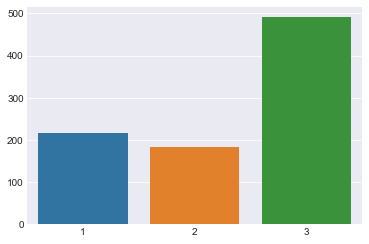

In [911]:
sns.barplot(data = train_df , x =  train_df.Pclass.value_counts().index , y =  train_df.Pclass.value_counts().values);
# başaramadım
# başardım : )


<a id=2></a>
# Verilerin açıklanması

1. PassengerId = Yolcu Numarası
1. Survived = Kazadan sağ cıktı mı (0 = öldü , 1 = yaşıyor)
1. Pclass = Yolcunun sınıfları (1 > 2 > 3)
1. Name = Yolcu ismi
1. Sex = Cinsiyet(Male = Erkek , Female = Kadın)
1. Age = Yaş
1. SibSp = kardeş veya eş sayısı
1. Parch = cocuk veya aileden kişi sayısı
1. Ticket = Bilet numarası
1. Fare = Ödediği para
1. Cabin = Kabin numarası ()
1. Embarked = Gemiye Hangi limandan binildiğini gösterir (S , C , Q)

In [912]:
for i in train_df.columns:
    print(i)
    
# İsimleri tek tek yazmamak için column isimlerini aldım

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [913]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* float64(2) = Fare , Age
* int64(5) = PassengerId , Survived ,Pclass, SibSp , Parch 
* object(5) = Name , Sex , Ticket , Cabin , Embarked

<a id = 3 ></a>

* Tek Değişken Analizi
    * [Kategorik Değişken](#4)
    * [Sayısal Değişken](#5)


<a id=4 ></a>
### Kategorik Değişken


In [914]:
def bar_plot(df ,desx):
    print("*****************" + desx + "****************************")
    print(train_df[desx].value_counts())
    
    
    sns.barplot(data = df , x =  df[desx].value_counts().index  ,y = df[desx].value_counts().values);
    plt.show()
    
    

*****************Survived****************************
0    549
1    342
Name: Survived, dtype: int64


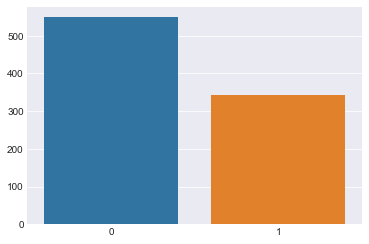

*****************Sex****************************
male      577
female    314
Name: Sex, dtype: int64


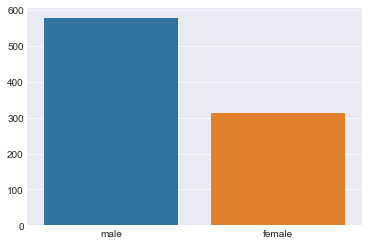

*****************Pclass****************************
3    491
1    216
2    184
Name: Pclass, dtype: int64


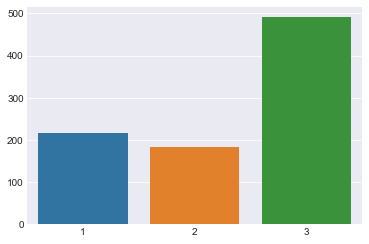

*****************Embarked****************************
S    644
C    168
Q     77
Name: Embarked, dtype: int64


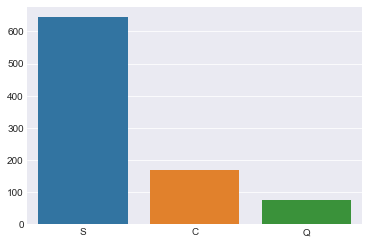

*****************SibSp****************************
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


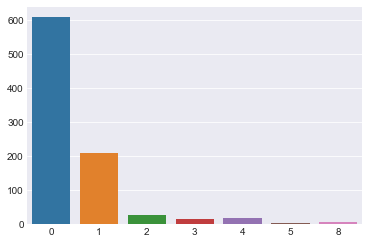

*****************Parch****************************
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


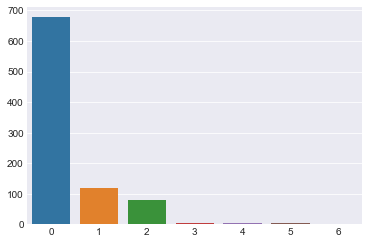

In [915]:
cat_list = ["Survived" , "Sex" , "Pclass" , "Embarked" ,"SibSp" ,"Parch" ]

for c in cat_list:
    bar_plot(train_df,c)

In [916]:
cat_list2 = ["Name", "Cabin" , "Ticket"]
for c in cat_list2:
    print("********************" + c + "****************************")
    print("{} \n" .format(train_df[c].value_counts()) )
    

********************Name****************************
Caldwell, Mrs. Albert Francis (Sylvia Mae Harbaugh)    1
Elsbury, Mr. William James                             1
Landergren, Miss. Aurora Adelia                        1
Goodwin, Master. Sidney Leonard                        1
Sloper, Mr. William Thompson                           1
                                                      ..
Goodwin, Mr. Charles Edward                            1
Jussila, Mr. Eiriik                                    1
McCarthy, Mr. Timothy J                                1
McCormack, Mr. Thomas Joseph                           1
Brown, Miss. Amelia "Mildred"                          1
Name: Name, Length: 891, dtype: int64 

********************Cabin****************************
C23 C25 C27    4
B96 B98        4
G6             4
F2             3
D              3
              ..
A20            1
B4             1
B80            1
C82            1
B78            1
Name: Cabin, Length: 147, dtype: int64 

<a id=5 ></a>
### Sayısal Değişken

In [917]:
def hist_plot(df , desx):
    
    sns.distplot(df[desx] ,bins =10 ,kde = False)
    plt.show()
    sns.kdeplot(df[desx] ,shade = True )
    plt.show()

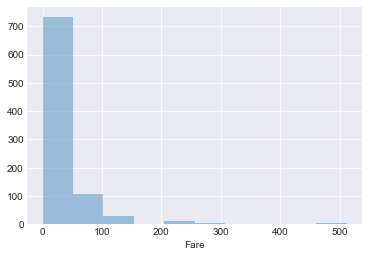

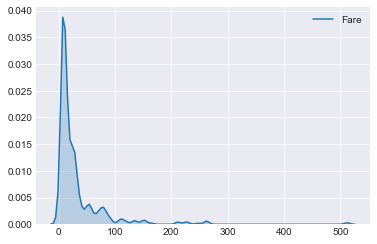

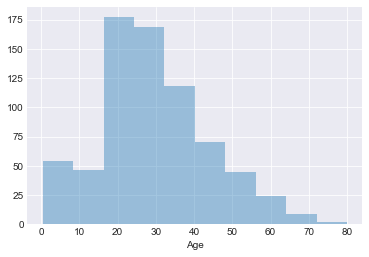

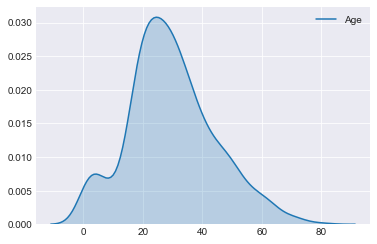

In [918]:
num_list = ["Fare" ,"Age" ]

for n in num_list:
    hist_plot(train_df ,n)

<a id=6 ></a>
## Basit Veri Analizi

* Sex - Survived
* Pclass - Survived
* Parch - Survived
* SibSp - Survived 

Aralarında bir ilişki var mi ? 



***************Sex**************
        Survived
Sex             
female  0.742038
male    0.188908


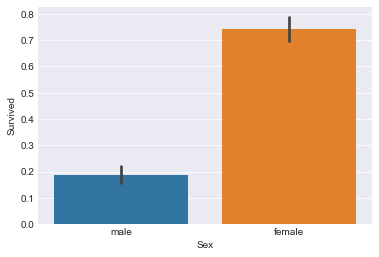

***************Pclass**************
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


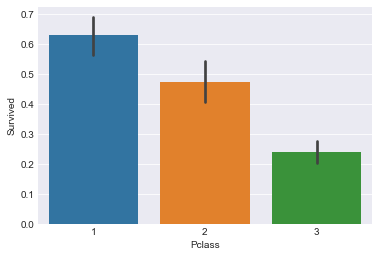

***************Parch**************
       Survived
Parch          
3      0.600000
1      0.550847
2      0.500000
0      0.343658
5      0.200000
4      0.000000
6      0.000000


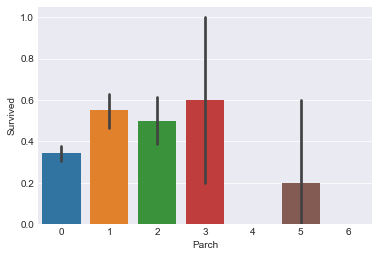

***************SibSp**************
       Survived
SibSp          
1      0.535885
2      0.464286
0      0.345395
3      0.250000
4      0.166667
5      0.000000
8      0.000000


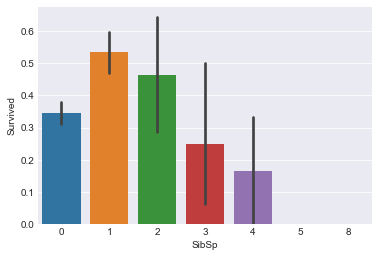

In [919]:
realtion_list = ["Sex" , "Pclass" ,"Parch" , "SibSp" ]


for r in realtion_list: 
    print("***************"+ r +"**************")
    df = train_df[["Survived" , r]].groupby(r ).mean().sort_values(by = "Survived" ,ascending = False)
    print(df)
    
    sns.barplot(data= train_df , x = r ,y = "Survived");
    plt.show()
    

<a id = 7 ></a>
## Aykırı Gözlem Silme 

In [920]:
def delete_outlier(df ,df_cols):
    outlier_indices = list() 
    
    for c in df_cols:
        Q1 = np.percentile(df[c] , 25)

        Q3 = np.percentile(df[c] , 75)

        IQR  = Q3 - Q1 

        outlier_step =  IQR * 1.5

        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)]

        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i , v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers

In [921]:
#train_df.loc[delete_outlier(train_df , ["Age" ,"Fare" , "Parch" ,"SibSp"])]#

<a  id = 8 ></a>
## Boş gözlemler
* [Boş gözlemleri Bulma](#9)
* [Boş gözlemleri Doldurma](#10)

### Boş gözlemleri Bulma

In [922]:
df = pd.concat([train_df, test_df],ignore_index=True)
df.head(3)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282


In [923]:
df.columns[df.isnull().any()]
#içinde en az 1 tane boş değer olan column'ları getir

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Survived'], dtype='object')

In [924]:
df.isnull().sum()
# nerede ne kadar boş gözlem olduğunu listele

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [925]:
train_df[df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


<a id = 10 ></a>

### Boş gözlemleri Doldurma

- Embarked = 2 tane değer
- Fare  = 1 tane değer

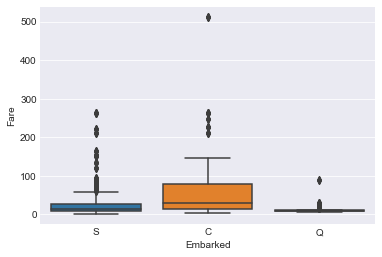

In [926]:
sns.boxplot(data = df , x = "Embarked" ,y =  "Fare");
# 80 dolara yakım  bilet ücreti  ödüyenlerin limanı C limanıdır 


In [927]:
df["Embarked"] = df["Embarked"].fillna("C")
df[df["Embarked"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


In [928]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [929]:
df[ (df["Pclass"] == 3) & (df["Embarked"] == "S" )]["Fare"].mean()
# S limanından binip 3.sınıfa ait yolcular kaç para ödemiştir

14.435422064777338

In [930]:
df["Fare"] = df["Fare"].fillna(14.435422064777338)

In [931]:
df["Fare"].isnull().sum()
# evet değerimiz başarılı bir şekilde atanmış

0

<a id = 11 ></a>
# Veri görselleştirme
* [(Survived ,Age , Parch , Sibsp , Pclass)  arasındaki ilişki ](#12) 
* [(SibSp -- Survived ) arasındaki ilişki ](#13)
* [(Parch -- Survived ) arasındaki ilişki ](#14)
* [(Pclass -- Survived) arasındaki ilişki ](#15)
* [(Age -- Survived ) arasındaki ilişki ](#16)
* [(SibSp -- Age -- Survived) arasındaki ilişki](#17)
* [(Embarked -- Pclass -- Sex -- Survived) arasındaki ilişki](#18)
* [(Embarked -- Pclass -- Sex -- Survived) arasındaki ilişki](#19)
* [(Embarked -- Fare -- Sex -- Survived) arasındaki ilişki](#20)
* [(Age) değişkenindeki boşlukları doldurma](#21)
    

<a id= 12 ></a>
### (Survived ,Age , Parch , Sibsp , Pclass) arasındaki ilişki

In [932]:
cor_list = ["Age" ,"Fare" ,"SibSp", "Parch" , "Survived"]
corr = df[cor_list].corr() 
print(corr)
# Aralarındaki Korelasyon durumlarına bakalım 

               Age      Fare     SibSp     Parch  Survived
Age       1.000000  0.177528 -0.243699 -0.150917 -0.077221
Fare      0.177528  1.000000  0.160350  0.221635  0.257307
SibSp    -0.243699  0.160350  1.000000  0.373587 -0.035322
Parch    -0.150917  0.221635  0.373587  1.000000  0.081629
Survived -0.077221  0.257307 -0.035322  0.081629  1.000000


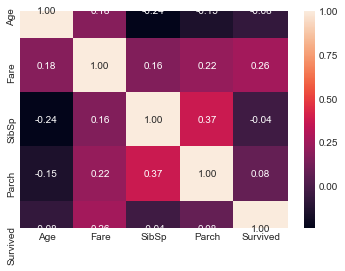

In [933]:
# şimdi bunu bir görsel üzerinde görelim
sns.heatmap(data = corr , fmt = ".2f" , annot = True);

#annot rakamları gösterir , fmt ise rakam gösterimini düzenler

- Grafiğe bakarak Fazla para ödüyenelerin yaşama olasılığın daha yüksel olduğunu söyleyebiliriz
- (0.26)

<a id =13></a>
### (SibSp -- Survived ) arasındaki ilişki

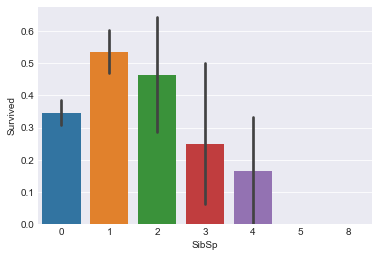

In [934]:
sns.barplot(data = df  , x = "SibSp" , y= "Survived");
# sns.factorplot(data = df , x = "Sibsp" ,y = "Survived" , kind= "bar" , size = 9)

- Sibsp 0 ile 2 arasında olanların yaşama oranı daha yüksek 
- dilersek 0 ile 2 arasını bir özellik  2 den sonrasın bir özellik olarak kabul edip makine oğrenmemizde kullanabiliriz

<a id = 14></a>
### (Parch -- Survived ) arasındaki ilişki

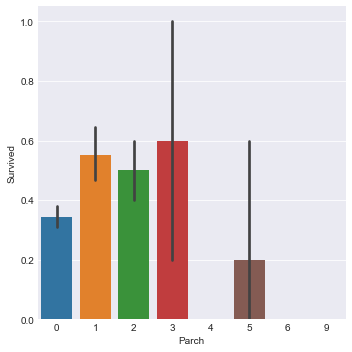

In [935]:

fig = sns.factorplot(data = df , x = "Parch" , y = "Survived", kind = "bar");



- yanında 3 kişiden fazla olanların yaşama oranı çok düşüktür 
- 0 ile 3 arasında ise yaşama oranı çok yüksek 3 den fazla olan toplulukların yaşama oranı düşüktür 
- bireylerin yaşama oranı 1 , 2 ve 3 kişilik gruplardan küşüktür 
- 3 kişilik grubun standart sapması yüksektir 


<a id = 15></a>
### (Pclass -- Survived) arasındaki ilişki 

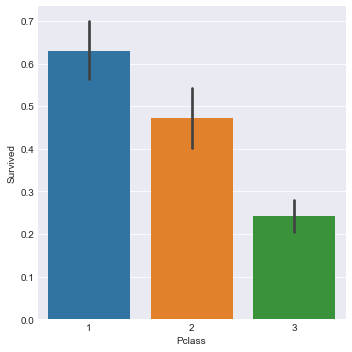

In [936]:
sns.factorplot(data = df ,x = "Pclass" , y = "Survived", kind = "bar");

- Sınıfı yüksek olanların yani zenginlerin yaşama oranı daha yüksektir
- Machine learning  eğitiminde kullanılabilecek iyi bir değişken 


<a id = 16 ></a>
### (Age -- Survived ) arasındaki ilişki

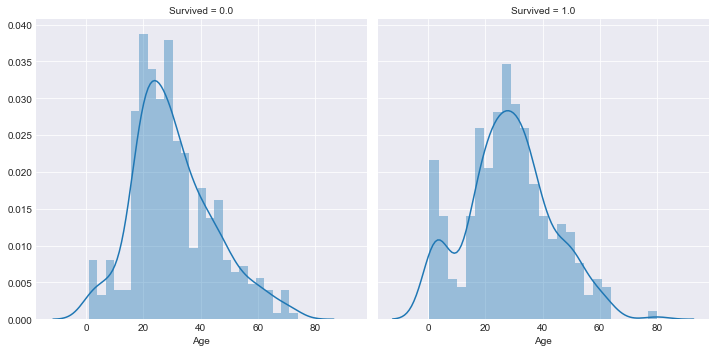

In [937]:
(sns
.FacetGrid(
    data = df ,
    col = "Survived", # Columları bu değişkene göre oluştur ,
    height = 5
    )
.map(sns.distplot , "Age" , bins = 25)
.add_legend()
);

- cocukların hayatta kalma oranında bir yükseklik vardır yani çocuklara öncelik verilmiştir
- yaşlı(80) yaşındaki insanlara öncelik verilmiş olabilir 
- 20 ile 30 yaş arası yaşama oranı 30 ile 35 arasındaki kişilerin daha azdır 
- yaş ve yaşama oranlarını kullanarak boş yaş alanlarını doldurulabilir

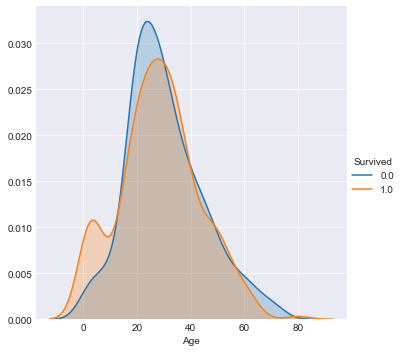

In [938]:
(sns
.FacetGrid(
    data = df ,
    hue = "Survived", # Survived değişkenini 3.boyut olarak ekler,
    height = 5
    )
.map(sns.kdeplot , "Age" ,shade = True)
.add_legend()
);

- cocukların yaşama oranında tepelenme vardır 


<a id = 17></a>
### (SibSp -- Age -- Survived) arasındaki ilişki

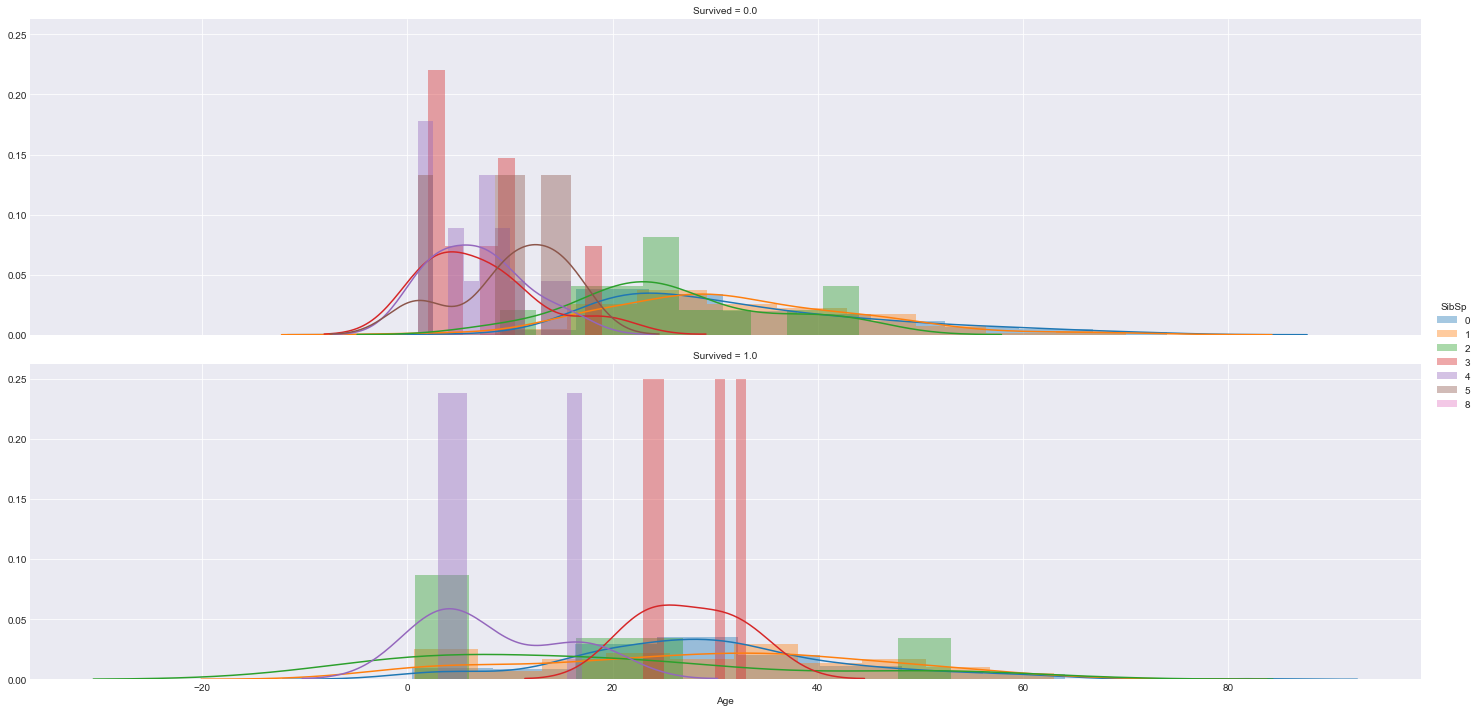

In [939]:
(sns
.FacetGrid(data = df ,
          hue = "SibSp",
          row = "Survived",
          height = 5,
          aspect = 4
          )
.map(sns.distplot ,"Age" , bins = 10)
.add_legend()

);

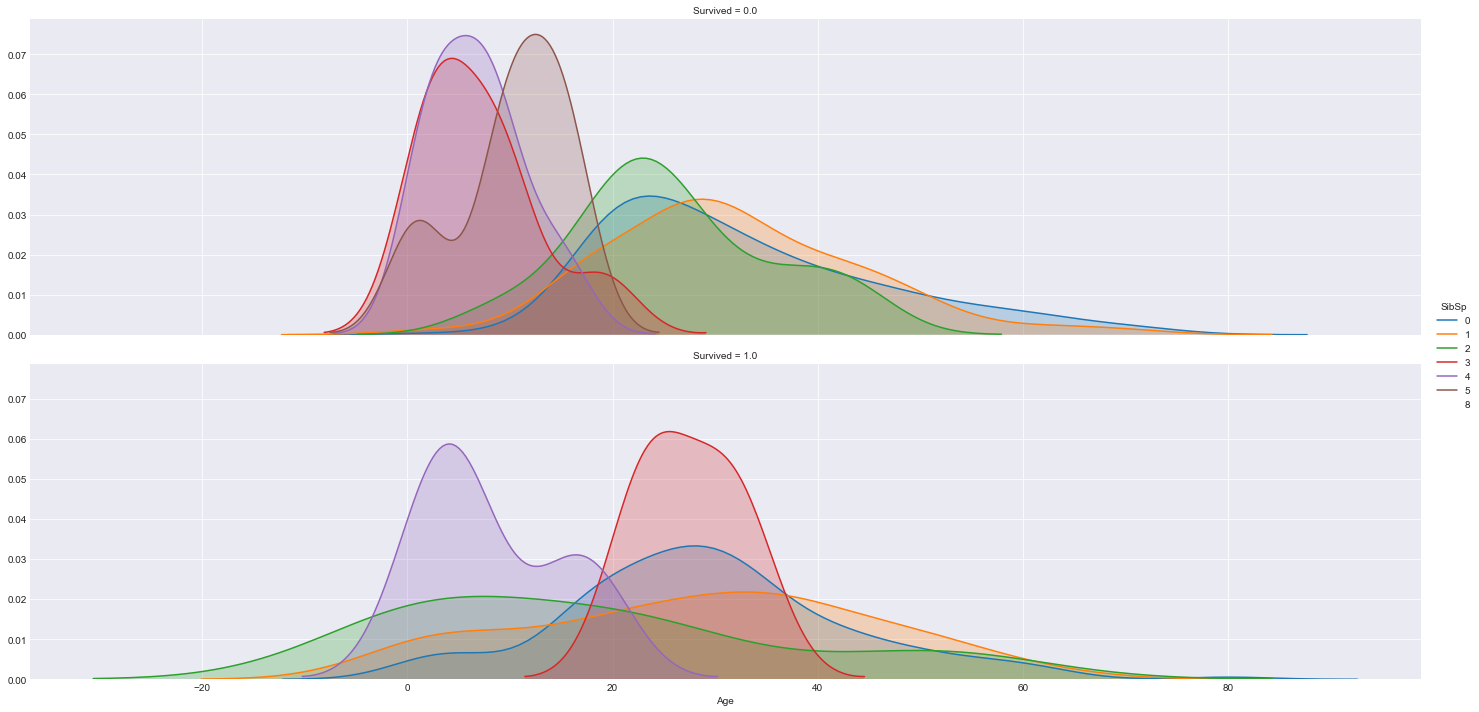

In [940]:
(sns
.FacetGrid(data = df ,
          hue = "SibSp",
          row = "Survived",
          height = 5,
          aspect = 4
          )
.map(sns.kdeplot ,"Age" ,shade = True )
.add_legend()

);

- dört ve iki kişilik ailelerin cocukarının yaşama oranı diğer aile gruplarından yüksektir 
- 25 ile 35 yaş arasındaki 3 kişilik ailenin yaşama oranı tüm gruplardan yüksektir 
- genç yaşlardaki birey ve çokukların 3 ,4 ,5 kişilik gruplarda ise yaşama oranı düşüktür 
- 3 ve 4 kişilik grupların hem aşama hemde olum oranında en yükseklerde olduğu gözlemleniyor 
- birey olarak seyahat edenlerden kurtulanların yaş ortalaması 30 , olumler 24 yaş ortalamasında yoğundur 

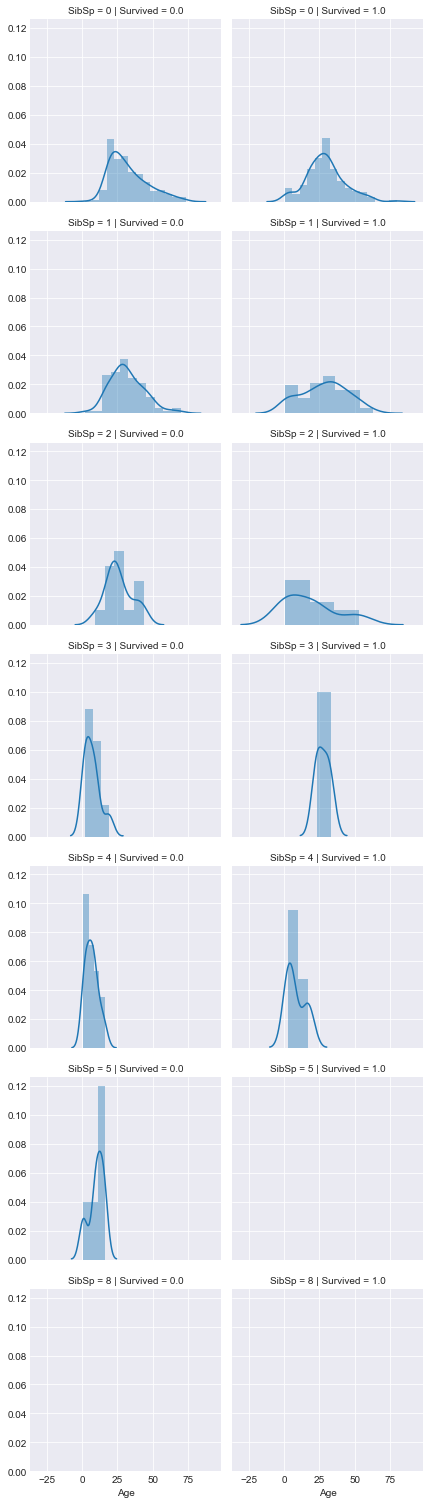

In [941]:
(sns
.FacetGrid(
        data = df ,
        col = "Survived",
        row = "SibSp"
        
        )
.map(sns.distplot , "Age"  )
.add_legend()
);

<a id = 18 ></a>
### (Pclass -- Age -- Survived) arasındaki ilişki

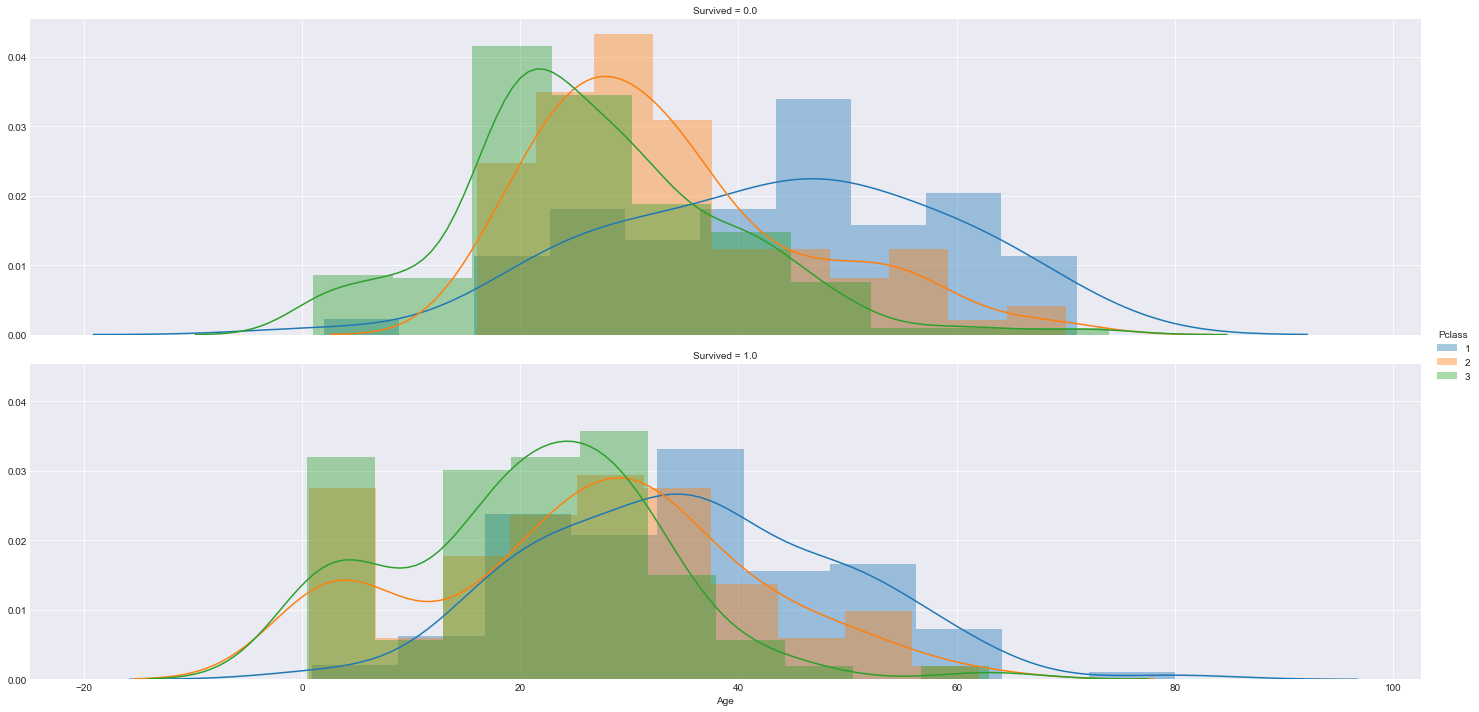

In [942]:
(sns
.FacetGrid(
        data = df ,
        hue = "Pclass",
        row = "Survived",
        height = 5,
        aspect = 4

        )
.map(sns.distplot , "Age" , bins = 10)
.add_legend()
);

- 36 - 40  yaş ortalamasındaki 1.sınıfa ait zengin bireylerin kurtılma oranı o yaştakilere oranla yüksektir 
- 0 - 6 yas ortalamasındaki kişilerin ikinci ve üçüncü sınıftakı kişiler olduğu ve kurtulma oranının yüksek olduğu gözüküyor 
- 1.sınıfta en fazla ölüm 43 ile 47 yaşa arasındadır , 2.sınıftaki en fazla ölüm 30 ile 35 arasındadır  , 3.sınıftaki kişilerin en fazla olüm 18 ile 25 yaş arasındadır 
- sınıflar arası kurtulanların kesiştiği nokta 35 yaş cıvarındadır 



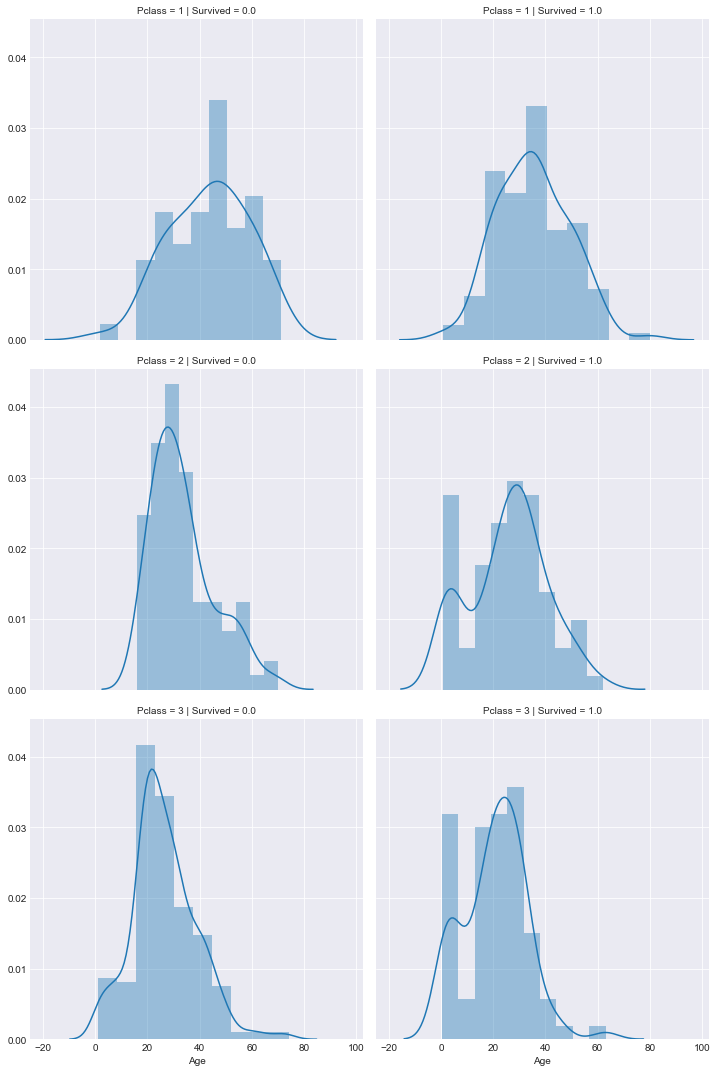

In [943]:
(sns
.FacetGrid(
        data = df ,
        row = "Pclass",
        col = "Survived",
        height = 5,
        

        )
.map(sns.distplot , "Age" , bins = 10)
.add_legend()
);

<a id = 19 ></a>
### (Embarked - Pclass -- Sex -- Survived) arasındaki ilişki

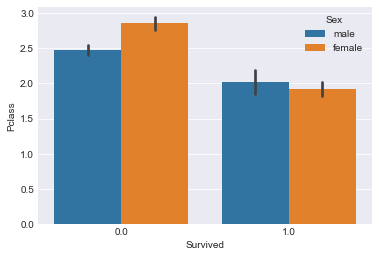

In [944]:
sns.barplot(data = df , x = "Survived" , y = "Pclass" , hue = "Sex");

- Erkeklerin yaşama oranı yüksektir , dolayısıyla kadınların yaşama oranı erkeklere oranla daha azdır 


#### Pclass -- Sex -- Survived) arasındaki ilişki

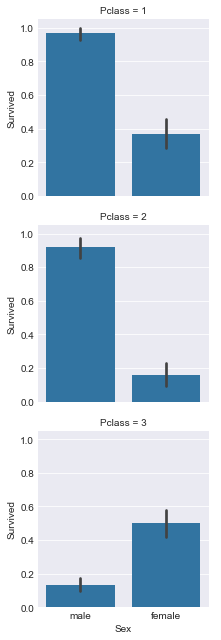

In [945]:

(sns
.FacetGrid(
        data = df ,
        row = "Pclass",
        
        )
.map(sns.barplot ,"Sex","Survived"  )
.add_legend()
);

- 1. ve 2 . sınıflarda erkeklerin yaşama oranı yüksetir 
- 3. class' a ayit kadınların yaşama oranı daha yüksektir
- erkeklerin yaşama oranını yükselten 1 ve 2. sınıflardır
- kadınların yaşama oranını yükselten 1 ve 3. sınıflardır 


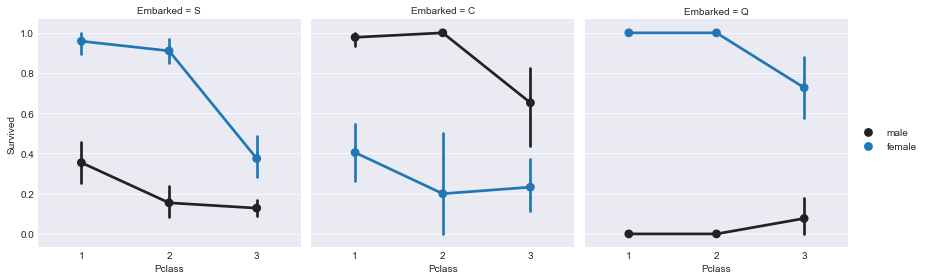

In [946]:
(sns
.FacetGrid(
        data = df ,
        col = "Embarked" ,
        size = 4
        )
.map(sns.pointplot , "Pclass" , "Survived" ,"Sex")

.add_legend()
);

- S limanından binen  1. sınıf ve 2. sınıf kadınların yaşama oranı yüksektir 
- C limanından binen 1. sınıf ve 2. sınıf erkeklerin yaşama oranı daha yüksektir ,ayrıca 3.sınıf için yüksek bir standart sapma vardır bunun incelenmesi gerekir 
- C limanından binen 1. sınıf ve 2. sınıf kadınlarda standart sapma yuksek iken yaşama oranları diğer limanlara göre birbirine yakındır 
- Q limanından binen 1. sınıf ve 2. sınıf kadınların yaşama oranı yüksek iken , erkeklerin yaşama oranı 0 dır bu değerlerin Q limanında binen kişi sayısından mı kaynaklandığına bakılmalıdır 
- Q limanında 3. sınıf yolcuların kurtulma oranı diğer Q limanındaki sınıf yolcularına oranla daha yüksektir 

<a id = 20></a>
### (Embarked -- Fare -- Sex -- Survived) arasındaki ilişki

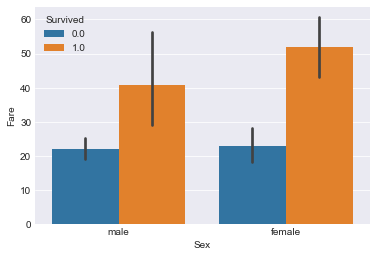

In [947]:
sns.barplot(data = df ,x = "Sex" , y = "Fare" , hue = "Survived");
# kadınlarda ve erkeklerde yaşayanların para ile orantısı 

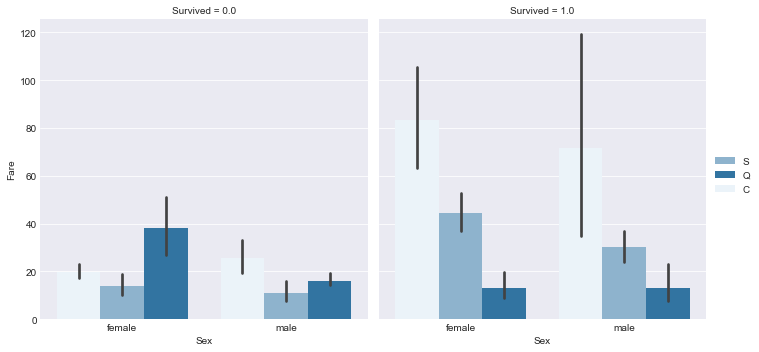

In [948]:
(sns
.FacetGrid(
        data = df ,
        col = "Survived",
        size = 5
        
        )
 
.map(sns.barplot , "Sex" , "Fare" ,"Embarked")
.add_legend()
);

- Q limanından binen erkeklerin verdiği paralar yüksektir ve standart sapmadada yükseklik vardır
- C limanında binen Kadınların vediği para ortalaması daha yüksektedir 
- Q sınıfndan erkekler C sınıfından ise kadınlar daha fazla ücret ödemişlerdir ve bu daha fazla ücret ödeyen kişiler hayatta kalma oranı daha yüksektedir 

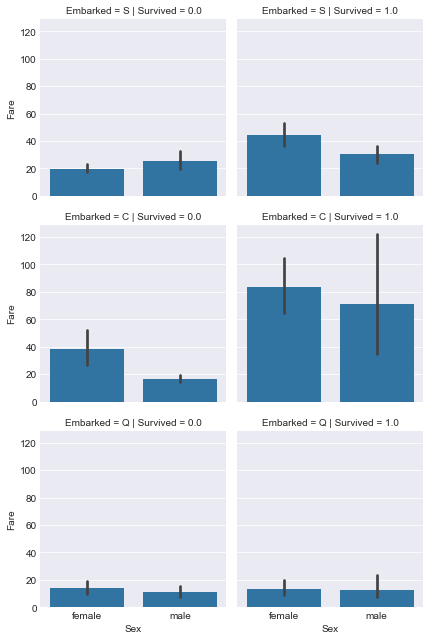

In [949]:
(sns
.FacetGrid(
        data = df,
        col = "Survived",
        row = "Embarked"
        
        )
.map(sns.barplot , "Sex" ,"Fare")
.add_legend()
);

- Q limanında kadın ve erkeklein ölüm ve yaşama olasılıklaraı hemen hemen aynıdır


<a id = 21 ></a>
### (Age) değişkenindeki boşlukları doldurma

In [950]:
df[df["Age"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
17,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,18,2,male,0,1.0,244373
19,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,20,3,female,0,1.0,2649
26,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,27,3,male,0,0.0,2631
28,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,3,female,0,1.0,330959
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,NaN,NaN,Q,7.7208,"Riordan, Miss. Johanna Hannah""""",0,1300,3,female,0,NaN,334915
1301,NaN,NaN,Q,7.7500,"Naughton, Miss. Hannah",0,1302,3,female,0,NaN,365237
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


#### Sex - Age arası ilişki

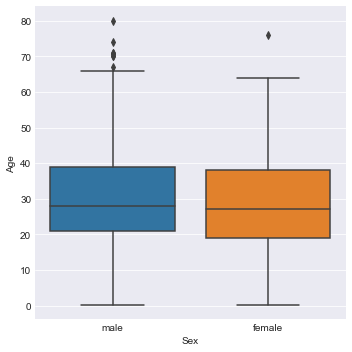

In [951]:
sns.factorplot(data =df , x = "Sex" , y = "Age" , kind = "box");
# erkek veya kadın olmasının herhangi bir anlamı yok çunkü medyanları aynı

#### SibSp - Sex arası ilişki

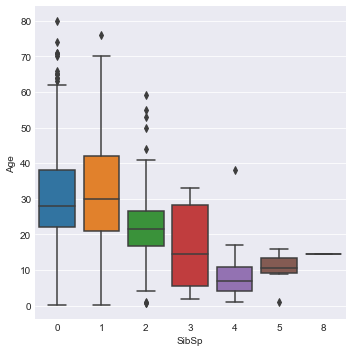

In [952]:
sns.factorplot(data = df , x = "SibSp" , y = "Age" ,kind = "box");

- 0 ,1 ,2 tane kişi ile gelenlerin yaş ortalaması ve medianı yüksektir 
- 3 den fazla kişyle gelenlerin yaş mediyanları 8 ile 15 yaşa arasındadır.

- Moran adlı kişinin SibSp değeri sıfırdır ve tahmıni olarak bu kişi 30 yaş civarlarındadır  

#### Parch - Age arası ilişki 

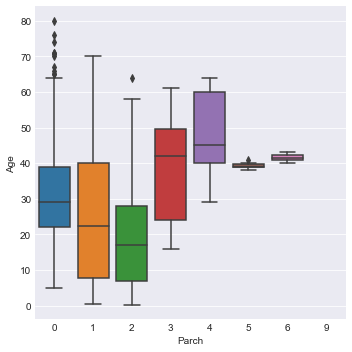

In [953]:
sns.factorplot(data = df , x = "Parch"  ,y = "Age" , kind = "box");

- tek olarak gelen kişilerin yaş medyanı 30 yaş civarlarındadır
- yanında ailesinde 1 veya 2 kişi bulunanların medianı genç yaşları ifade etmektedir

- Moran adlı kişinin Parch değeri 0 dır , buna göre moran 30 yaşlara yakın bir kişi olabilr

In [954]:
# Sex Age - Pclass arasındaki ilişki 

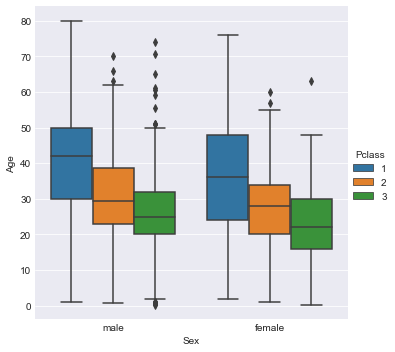

In [955]:
sns.factorplot(data = df , x = "Sex" ,y = "Age" , hue = "Pclass" ,kind = "box");

- En yaşlılar 1 sınıftadır 
- Her sınıfın yaş mediyanları birbirine yakındır 
- Pclass elimizde yaşları olmayan kişilerin yaşını tahmin etmek için çok güzel bir ayır edici özelliklerdendir

- Diğer değerlerde Moran adlı kişinin yasının 30 yaşlarına yakın olabileceğini tahmin etmiştik 
- Bu son incelediğimiz grafiğe göre Moran yaklaşık 25 yaşında olabileceği bilgisine ulaşıyoruz

### Şimdi ise bu ilişkileri bir sıcaklık haritasında görelim


In [956]:
df["Sex"] = ( 1 if i == "male" else 0 for i in df["Sex"])
# sinsiyet sayısal bir değişken olamadığı için aralarındaki ilişkinın korolasyonu bulunamaz 
# bundan dolayı 0 ve 1 lere dönüştürdük

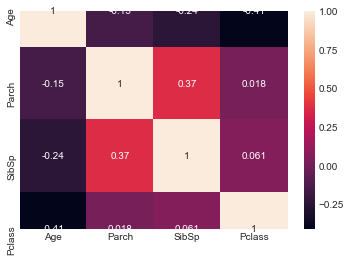

In [957]:
corr_list = ["Age" ,"Sex" ,"Parch" ,"SibSp" ,"Pclass"]
corr = df[corr_list].corr()
sns.heatmap(data = corr , annot= True);

- (-0.41) Pclass ile Age arasında negatif yönlü bir korelasyon vardır , bunu box plottada gözlemledik
- (-0.24) SibSp ile  Age arasında negatif yönlü bir korelasyon vardır , bunu box plottada gözlemledik
- (-0.15) Parch ile Age arasında negatif yönlü bir korelasyon vardır , bunu box plottada gözlemledik


#### Şimdi ise bu gözlerimize dayanarak Yaş değişkenimizi dolduralım 


In [958]:
index_nan_age = df[df["Age"].isnull()].index
# data framenin içinden yaş değişkeni null olan kişilerin index değerlerini aldık

In [959]:
for i in index_nan_age:
    # Ayni değerleri kapsıyan kişiler ile karşılaştırıp belirli bir yaş mediyanını buluyoruz 
    med1 = df[ (df["Parch"] == df.iloc[i]["Parch"]) & 
               (df["SibSp"] == df.iloc[i]["SibSp"]) &
               (df["Pclass"] == df.iloc[i]["Pclass"]) ]["Age"].median()
    
    # evet üsteki özeliikleri aynı anda saglamıyanlara en ayır edici özellik olan Pclass değerine göre yaş verelim 
    med2 = df[ (df["Pclass"] == df.iloc[i]["Pclass"]) ]["Age"].median()
    
    #Ustteki koşulları aynı anda sağlamıyan kişiler olacağından dolayı bunlara genel yaş mediyanınnı verelim 
    
    med3 =  df["Age"].median()
    
    if not np.isnan(med1):
        df["Age"].iloc[i] = med1
    
    else : 
        df["Age"].iloc[i] = med2
        if np.isnan(med2):
            df["Age"].iloc[i] = med3

In [960]:
print("med1 : {} \nmed2: {}\nmed3 : {}\n".format(med1 ,med2 ,med3))

med1 : 16.0 
med2: 25.0
med3 : 26.0



In [961]:
df[df["Age"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


In [962]:
df[df["Pclass"] == 3 ]["Age"].mean()

24.51057827926657

<a id = 22></a>
# Değişken analizi ,Değişken Birleşimleri ve Makina Öğrenmesine Uyarlanması
   * [Name-Title(İsim-Ünvan)](#23)
   * [Family size(Aile Boyutu)](#24)
   * [Embarket(Binilen liman)](#25)
   * [Pclasss(Yolcu sınıfı)](#26)
   * [Ticket(Bilet)](#27)
   * [Sex(Cinsiyet)](#28)

<a id=23></a>
## Name-Title(İsim-Ünvan)

Bu kısımda isim değişkenimizde gemideki yolcuların ve mürettebattan olan kişilerin ünvanları bulunuyor biz metin parçalama metodu ile bu ünvanlara erişeceğiz 
ve unvanlara göre yaşama olasığını grafıklıyeceğiz ardından makine oğrenmesi için tip dönüşümlerini yapacağız

In [963]:
df.head(3)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,<generator object <genexpr> at 0x0000016014F33...,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,<generator object <genexpr> at 0x0000016014F33...,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,<generator object <genexpr> at 0x0000016014F33...,0,1.0,STON/O2. 3101282


In [964]:
s = "Braund, Mr. Owen Harris"
s = s.split(".")[0]
s 
# "." değişkeniyle parçalıyoruz

'Braund, Mr'

In [965]:
s = s.split(",")[-1]
s
#ardından elimize gelen veriyi "," le ayırıp ünvanı alıyoruz

' Mr'

In [966]:
s = s.strip()
s
# ve sağında solunda olan boşlukları siliyoruz 

'Mr'

In [967]:
name = df["Name"]  
df["Title"] = [i.split(".")[0].split(",")[-1].strip()  for i in name]
# evet bu işlemleri veri setine uygulayıp Title Adındaki değişkene atadık 

In [968]:
df["Title"].head(3)

0      Mr
1     Mrs
2    Miss
Name: Title, dtype: object

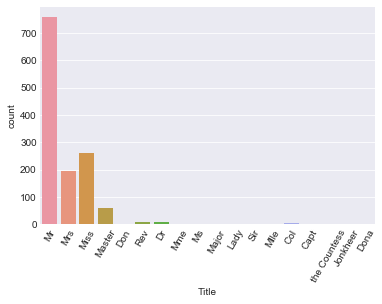

In [969]:
sns.countplot(data =df ,x = "Title")
plt.xticks(rotation = 60); # bu kod ile x eksenindeki yazıları 60 derece donderdim

- Mr  = Erkek ,
- Mrs =  Evli kadınlar ,
- Miss = Bekar kadınlar ,
- Ms = Evli veya bekar olduğu bilinmeyen kadınlar,
- Master çalışan ustalar olması lazım,

- Grafik incelenecek olursa kadınları bir kateğoriye toplayabiliriz (isteğe bağlı olarak)


In [970]:
df[["Title" , "Name"]].groupby("Title").count()

,Name
Title,
Capt,1
Col,4
Don,1
Dona,1
Dr,8
Jonkheer,1
Lady,1
Major,2
Master,61


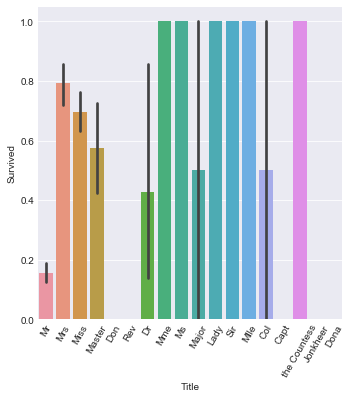

In [971]:
sns.factorplot(data = df , x = "Title" , y = "Survived" , kind = "bar")
plt.xticks(rotation = 60);

Grafik incelenecek olursa;
- Erkeklerin yaşama oranın çok düşük olduğu görülüyor 
- Kadınların Yaşama oranı çok yüksektir
- Captan ölmüştür 

gibi çıkarımlarda bulunabiliz

### simdi ise bu verileri daha az kategori ile temsil edelim 

In [972]:
df["Title"] = df["Title"].replace(["Lady" ,"the Countess" ,"Capt" ,"Col" ,"Dr" ,"Major" ,"Rev" , "Sir" ,"Jonkheer" , "Dona" ,"Don"], "Other")
# Title Columndan bu değişkenlerı seç ve bunları Other diye grupla

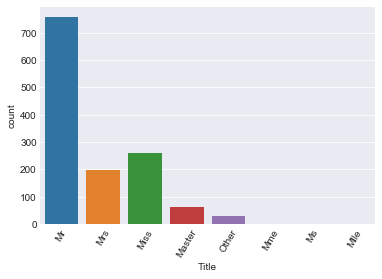

In [973]:
sns.countplot(data = df , x = "Title");
plt.xticks(rotation = 60);

In [974]:
df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mme" or i == "Mle" else 2 if i  == "Mr" else 3  for i in df["Title"]]
# Master = 0 , 
# Kadınlar = 1 ,
# Erkekler = 2 ,
# Other = 3 

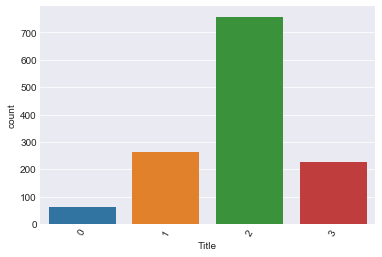

In [975]:
sns.countplot(data = df , x = "Title");
plt.xticks(rotation = 60);

- Grafiğe bakılarak erkek sayısının fazla olduğu görülüyor 
vs aynı cümleler burdada söylenebilir 

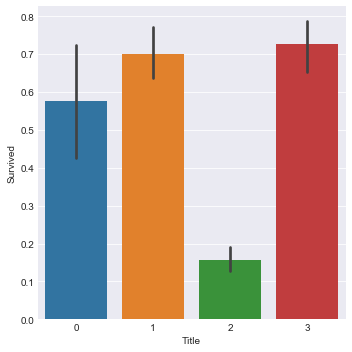

In [976]:
sns.factorplot( data = df ,x = "Title" , y = "Survived" ,kind = "bar");

In [977]:
df.drop(labels = "Name" ,axis = 1 ,inplace = True) 
# evet isimle işimiz olmadığı için siliyoruz

In [978]:
df = pd.get_dummies(df , columns = ["Title"] ) # evet şimdi her değişkeni sıfır bir olacak şekilde dummies ediyoruz

In [979]:
df.head()
# evet işlem başarılı değişkenler makina oğrenmesine hazır


,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title_0,Title_1,Title_2,Title_3
0,22.0,NaN,S,7.2500,0,1,3,<generator object <genexpr> at 0x0000016014F33...,1,0.0,A/5 21171,0,0,1,0
1,38.0,C85,C,71.2833,0,2,1,<generator object <genexpr> at 0x0000016014F33...,1,1.0,PC 17599,0,0,0,1
2,26.0,NaN,S,7.9250,0,3,3,<generator object <genexpr> at 0x0000016014F33...,0,1.0,STON/O2. 3101282,0,1,0,0
3,35.0,C123,S,53.1000,0,4,1,<generator object <genexpr> at 0x0000016014F33...,1,1.0,113803,0,0,0,1
4,35.0,NaN,S,8.0500,0,5,3,<generator object <genexpr> at 0x0000016014F33...,0,0.0,373450,0,0,1,0


<a id =24></a>
## Family size(Aile Boyutu)

Bu bölümde Parch ile Sibsp değişkenini toplayıp uzerine 1 ekleyip bir sutun oluşturup içine bunları atıyacağız ve bir karşılaştırmada bulunacağız

In [980]:
df.head(2)

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title_0,Title_1,Title_2,Title_3
0,22.0,NaN,S,7.2500,0,1,3,<generator object <genexpr> at 0x0000016014F33...,1,0.0,A/5 21171,0,0,1,0
1,38.0,C85,C,71.2833,0,2,1,<generator object <genexpr> at 0x0000016014F33...,1,1.0,PC 17599,0,0,0,1


In [981]:
df["Fsize"] = df["Parch"] + df["SibSp"] + 1
df["Fsize"] 

0       2
1       2
2       1
3       2
4       1
       ..
1304    1
1305    1
1306    1
1307    1
1308    3
Name: Fsize, Length: 1309, dtype: int64

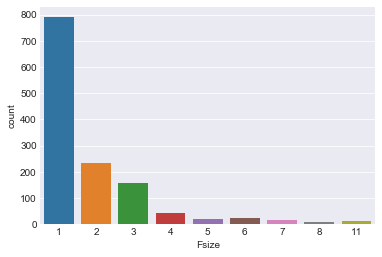

In [982]:
sns.countplot(data =df , x  ="Fsize")


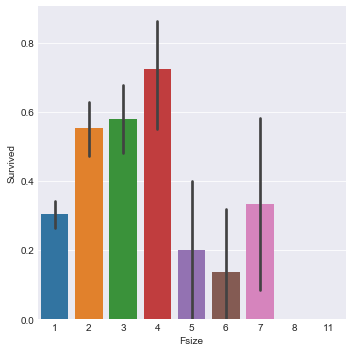

In [983]:
sns.factorplot(data = df , x = "Fsize" ,y = "Survived" ,kind = "bar");

evet yukarıdaki grafiği 3 değişkenli hale hetirelim ;

tek binenler , 2,3,4 kişi binenler ve 5den fazla kişi binenler olarak 



In [984]:
df["Family_size"] = [0 if i == 1  else 1  if (i < 5) else 2  for i in df["Fsize"]]

In [985]:
df.tail(1)

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title_0,Title_1,Title_2,Title_3,Fsize,Family_size
1308,16.0,NaN,C,22.3583,1,1309,3,<generator object <genexpr> at 0x0000016014F33...,1,NaN,2668,1,0,0,0,3,1


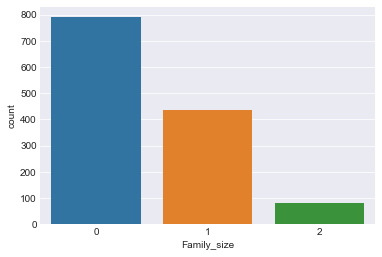

In [986]:
sns.countplot(data =df , x  ="Family_size");

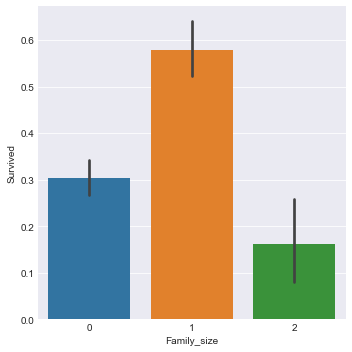

In [987]:
sns.factorplot(data = df , x = "Family_size" ,y = "Survived" ,kind = "bar");

şimdi ise bu 3 kategoriye indirdiğimiz değeri 0 ve 1 ler ile ifade edelim 

In [988]:
df = pd.get_dummies(data = df , columns =["Family_size"])

In [989]:
df.head(1)
# evet bu değişkenimiz de makine ogrenmesine hazır

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title_0,Title_1,Title_2,Title_3,Fsize,Family_size_0,Family_size_1,Family_size_2
0,22.0,NaN,S,7.25,0,1,3,<generator object <genexpr> at 0x0000016014F33...,1,0.0,A/5 21171,0,0,1,0,2,0,1,0


<a id = 25></a>
# Embarket(Binilen liman)

In [990]:
df["Embarked"]

0       S
1       C
2       S
3       S
4       S
       ..
1304    S
1305    C
1306    S
1307    S
1308    C
Name: Embarked, Length: 1309, dtype: object

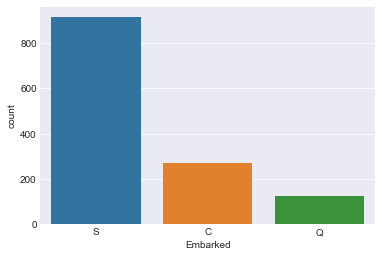

In [991]:
sns.countplot(data =df , x = "Embarked");

In [992]:
# liman analizini veri görselleştirme kısmında yaptıgım için burda yapmıyacağım 

In [993]:
df  = pd.get_dummies(data = df , columns= ["Embarked"]) 
# evet diyorki obje tipindeki nesneyiben bit türüne çeviremem senin bunu category turune cevirmen lazım diye ifade ediyor 

In [994]:
df.tail(1)

,Age,Cabin,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,...,Title_1,Title_2,Title_3,Fsize,Family_size_0,Family_size_1,Family_size_2,Embarked_C,Embarked_Q,Embarked_S
1308,16.0,NaN,22.3583,1,1309,3,<generator object <genexpr> at 0x0000016014F33...,1,NaN,2668,...,0,0,0,3,0,1,0,1,0,0


<a id =26></a>
# Pclasss(Yolcu sınıfı)

In [995]:
df["Pclass"].value_counts().index


Int64Index([3, 1, 2], dtype='int64')

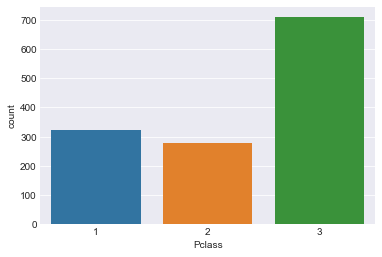

In [996]:
sns.countplot(data = df , x = "Pclass");

In [997]:
df  = pd.get_dummies(data = df ,columns = ["Pclass"])

In [998]:
df.head(1)

,Age,Cabin,Fare,Parch,PassengerId,Sex,SibSp,Survived,Ticket,Title_0,...,Fsize,Family_size_0,Family_size_1,Family_size_2,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,NaN,7.25,0,1,<generator object <genexpr> at 0x0000016014F33...,1,0.0,A/5 21171,0,...,2,0,1,0,0,0,1,0,0,1


<a id =27></a>
# Ticket(Bilet)

In [999]:
df.Ticket.tail(5)

1304             A.5. 3236
1305              PC 17758
1306    SOTON/O.Q. 3101262
1307                359309
1308                  2668
Name: Ticket, dtype: object

In [1000]:
tickets = []
for i in list(df.Ticket):
    if not i.isdigit(): # eger sayısal değer değilse
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
tickets[:5]

['A5', 'PC', 'STONO2', 'x', 'x']

In [1001]:
df["Ticket"] = tickets

In [1002]:
df.Ticket.head(3)

0        A5
1        PC
2    STONO2
Name: Ticket, dtype: object

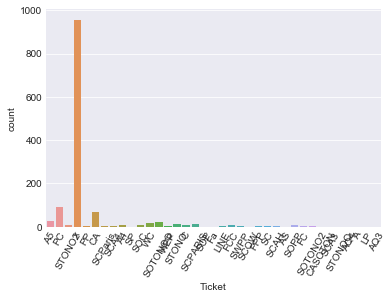

In [1003]:
sns.countplot(data = df ,x = "Ticket")
plt.xticks(rotation = 60);

- bunda cok çeşit var bun makina öğrenmesine uyarlamadan önce çeşit sayısını azaltmamız lazım

<a id = 28></a>
# Sex(Cinsiyet)

In [1004]:
df["Sex"] = df["Sex"].astype("category")
df = pd.get_dummies(data = df , columns = ["Sex"])

In [1005]:
df.tail(10)
# cinsiyetin veri tipi bozulmuş düzeltmek lazım
# evet sorun olduğu için sex_bacup'u atayacağız


,Age,Cabin,Fare,Parch,PassengerId,SibSp,Survived,Ticket,Title_0,Title_1,...,Family_size_0,Family_size_1,Family_size_2,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_<generator object <genexpr> at 0x0000016014F33848>
1299,25.0,NaN,7.7208,0,1300,0,NaN,x,0,1,...,1,0,0,0,1,0,0,0,1,1
1300,3.0,NaN,13.7750,1,1301,1,NaN,SOTONOQ,0,1,...,0,1,0,0,0,1,0,0,1,1
1301,25.0,NaN,7.7500,0,1302,0,NaN,x,0,1,...,1,0,0,0,1,0,0,0,1,1
1302,37.0,C78,90.0000,0,1303,1,NaN,x,0,0,...,0,1,0,0,1,0,1,0,0,1
1303,28.0,NaN,7.7750,0,1304,0,NaN,x,0,1,...,1,0,0,0,0,1,0,0,1,1
1304,25.0,NaN,8.0500,0,1305,0,NaN,A5,0,0,...,1,0,0,0,0,1,0,0,1,1
1305,39.0,C105,108.9000,0,1306,0,NaN,PC,0,0,...,1,0,0,1,0,0,1,0,0,1
1306,38.5,NaN,7.2500,0,1307,0,NaN,SOTONOQ,0,0,...,1,0,0,0,0,1,0,0,1,1
1307,25.0,NaN,8.0500,0,1308,0,NaN,x,0,0,...,1,0,0,0,0,1,0,0,1,1
1308,16.0,NaN,22.3583,1,1309,1,NaN,x,1,0,...,0,1,0,1,0,0,0,0,1,1


In [1008]:
df["Sex"] = sex_bacup

In [1009]:
df["Sex"]

0       <generator object <genexpr> at 0x0000016017010...
1       <generator object <genexpr> at 0x0000016017010...
2       <generator object <genexpr> at 0x0000016017010...
3       <generator object <genexpr> at 0x0000016017010...
4       <generator object <genexpr> at 0x0000016017010...
                              ...                        
1304    <generator object <genexpr> at 0x0000016017010...
1305    <generator object <genexpr> at 0x0000016017010...
1306    <generator object <genexpr> at 0x0000016017010...
1307    <generator object <genexpr> at 0x0000016017010...
1308    <generator object <genexpr> at 0x0000016017010...
Name: Sex, Length: 1309, dtype: object